# Import packages to parse results

In [3]:
import plotly.graph_objects as go
import scipy.stats as stats
from tabulate import tabulate
from IPython.display import HTML

# Import from shared notebook containing helper methods
import import_ipynb
from shared_notebook import create_dataframe, write_image, create_figure

importing Jupyter notebook from shared_notebook.ipynb
Stored 'colorPallet' (list)


### Set default color palete and size for making plots

In [21]:
%store -r colorPallet

## Log file locations relative to notebook

### For SEBS, we have 3 different clusters, 4 methods, multiple concurrent calls

In [1]:
# kOps clusters (running on AWS)
# AWS EKS cluster
clusters={
    'kOps 1x 72vCPU 144Gb x86_64': 'kops-multi-tenant-spot-1x-72vcpu-144gb',
    'kOps 8x 8vCPU 16Gb x86_64': 'kops-multi-tenant-spot-8x-8vcpu-16gb',
    'kOps 16x 4vCPU 8Gb x86_64': 'kops-multi-tenant-spot-16x-4vcpu-8gb',
    'EKS 8x 8vCPU 16Gb x86_64': 'eks-multi-tenant-spot-8x-8vcpu-16gb'
}
methods=('dna', 'bfs', 'mst', 'pagerank')
headers=list(methods)
headers.insert(0, 'concurrent calls')
concurrent_calls=(32, 64, 96, 128)

In [4]:
sebs_df=dict()
for k, v in clusters.items():
    sebs_df[k]=dict()
    for m in methods:
        sebs_df[k][m]=dict()
        for c in concurrent_calls:
            sebs_df[k][m][c]=create_dataframe(f'../logs/openfaas/{v}/sebs/concurrent/{c}/*{m}*')

# Using tabulate to create tables for results

In [23]:
# Mean runtime
table=dict()
for k in clusters:
    data=[]
    for count, value in enumerate(concurrent_calls):
        data.append([value])
        for m in methods:
            mean_runtime=sebs_df[k][m][value]['runtime'].mean()
            data[count].append(mean_runtime)
    table[k] = tabulate(data, tablefmt='html', headers=headers)
    display(HTML(f'<h3>Mean runtimes (ms), cluster <b>{k}</b></h3>'))
    display(table[k])
    print()

concurrent calls,dna,bfs,mst,pagerank
32,18033.2,101.58,99.446,190.611
64,18094.5,105.169,102.408,195.966
96,18276.5,103.153,101.583,198.042
128,18410.6,153.773,103.043,198.235


concurrent calls,dna,bfs,mst,pagerank
32,15596.7,68.7926,45.6506,81.9545
64,16573.3,69.7188,64.4673,112.663
96,20266.4,112.173,65.6686,120.433
128,18822.5,121.853,66.5156,125.374


concurrent calls,dna,bfs,mst,pagerank
32,30613.2,51.3409,41.2812,73.7699
64,59449.1,51.9391,44.8031,84.3906
96,21869.3,82.599,79.0375,142.703
128,22968.8,83.4328,81.95,142.804


concurrent calls,dna,bfs,mst,pagerank
32,15128.4,67.767,46.4744,84.767
64,16929,70.9247,66.7827,116.661
96,17558.5,74.3371,66.1335,122.107
128,18074.2,77.5249,66.3175,124.608


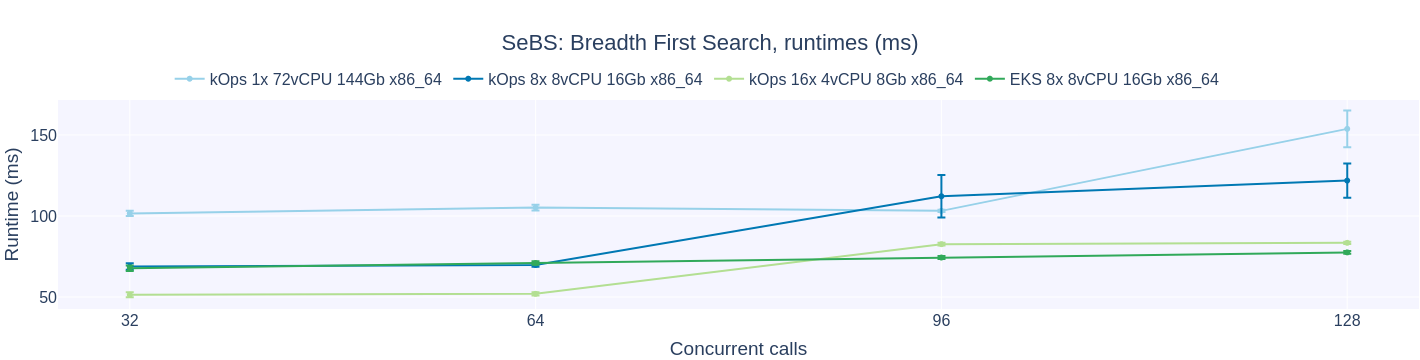

In [39]:
fig = create_figure('SeBS: Breadth First Search, runtimes (ms)', 'Concurrent calls', 'Runtime (ms)', concurrent_calls)

for i, k in enumerate(clusters):
    fig.add_trace(
        go.Scatter(
            x = concurrent_calls,
            y = [sebs_df[k]['bfs'][c]['runtime'].mean() for c in concurrent_calls],
            error_y=dict(
                type='data',
                symmetric=True,
                array=[sebs_df[k]['bfs'][c]['runtime'].sem() for c in concurrent_calls]
            ),
            name = k,
            marker_color=colorPallet[i]
        )
    )

fig.show()

# Save graph
write_image(fig, 'sebs_bfs_runtime_scatter.png')

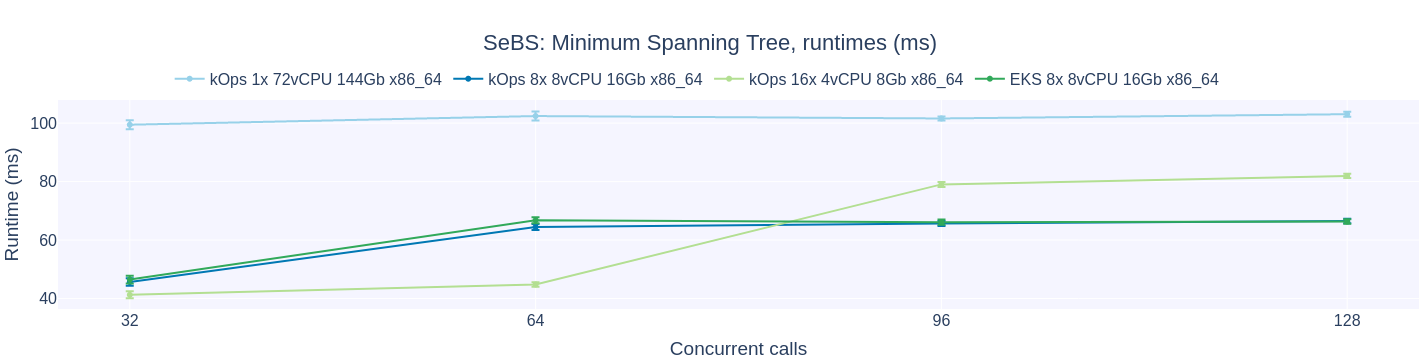

In [40]:
fig = create_figure('SeBS: Minimum Spanning Tree, runtimes (ms)', 'Concurrent calls', 'Runtime (ms)', concurrent_calls)

for i, k in enumerate(clusters):
    fig.add_trace(
        go.Scatter(
            x = concurrent_calls,
            y = [sebs_df[k]['mst'][c]['runtime'].mean() for c in concurrent_calls],
            error_y=dict(
                type='data',
                symmetric=True,
                array=[sebs_df[k]['mst'][c]['runtime'].sem() for c in concurrent_calls]
            ),
            name = k,
            marker_color=colorPallet[i]
        )
    )

fig.show()

# Save graph
write_image(fig, 'sebs_mst_runtime_scatter.png')

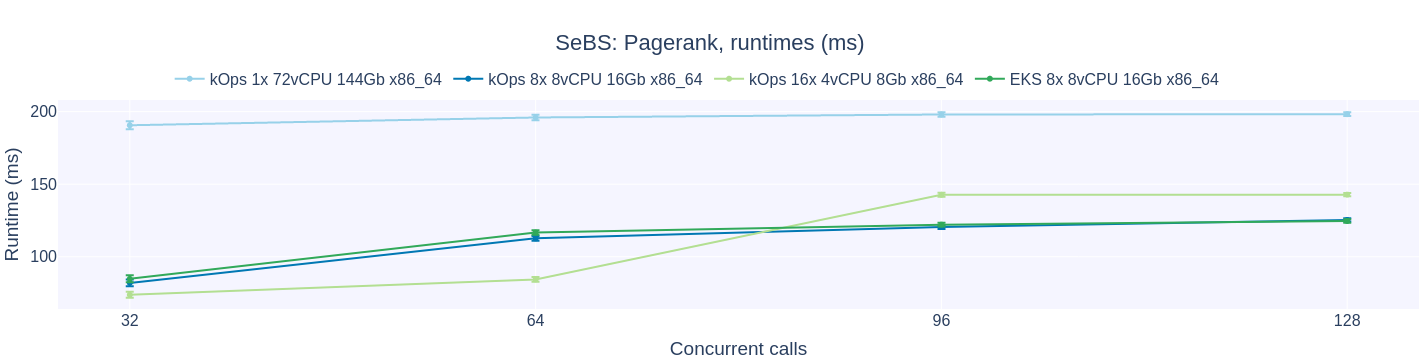

In [41]:
fig = create_figure('SeBS: Pagerank, runtimes (ms)', 'Concurrent calls', 'Runtime (ms)', concurrent_calls)

for i, k in enumerate(clusters):
    fig.add_trace(
        go.Scatter(
            x = concurrent_calls,
            y = [sebs_df[k]['pagerank'][c]['runtime'].mean() for c in concurrent_calls],
            error_y=dict(
                type='data',
                symmetric=True,
                array=[sebs_df[k]['pagerank'][c]['runtime'].sem() for c in concurrent_calls]
            ),
            name = k,
            marker_color=colorPallet[i]
        )
    )
    
fig.show()

# Save graph
write_image(fig, 'sebs_pagerank_runtime_scatter.png')

In [28]:
# Standard deviation runtime
table=dict()
for k in clusters:
    data=[]
    for count, value in enumerate(concurrent_calls):
        data.append([value])
        for m in methods:
            std_runtime=sebs_df[k][m][value]['runtime'].std()
            data[count].append(std_runtime)
    table[k] = tabulate(data, tablefmt='html', headers=headers)
    display(HTML(f'<h3>Standard deviation (ms), cluster <b>{k}</b></h3>'))
    display(table[k])
    print()

concurrent calls,dna,bfs,mst,pagerank
32,2336.19,30.1518,29.0074,51.1606
64,2478.02,45.7842,40.2355,51.6854
96,2202.65,24.0276,22.7027,49.1147
128,2309.33,426.752,31.6376,48.0879


concurrent calls,dna,bfs,mst,pagerank
32,4400.35,37.8438,24.1972,43.632
64,5512.08,27.9015,27.8412,43.3171
96,9351.38,428.532,28.7584,41.5123
128,7510.12,397.6,27.7731,42.0833


concurrent calls,dna,bfs,mst,pagerank
32,15491.9,29.7565,22.7972,38.4851
64,32924.1,25.0545,19.7218,39.9131
96,10750.6,26.8804,26.3345,41.4904
128,10472.2,25.5724,27.0136,38.5771


concurrent calls,dna,bfs,mst,pagerank
32,4317.71,31.3217,24.4637,45.3009
64,5625.96,28.0706,26.9191,42.2132
96,7656.34,28.7101,28.2664,43.6486
128,7815.96,29.2769,28.6594,43.8045


In [29]:
# CV runtime
table=dict()
for k in clusters:
    data=[]
    for count, value in enumerate(concurrent_calls):
        data.append([value])
        for m in methods:
            mean_runtime=sebs_df[k][m][value]['runtime'].mean()
            std_runtime=sebs_df[k][m][value]['runtime'].std()
            cv_runtime=std_runtime/mean_runtime
            data[count].append(cv_runtime)
    table[k] = tabulate(data, tablefmt='html', headers=headers)
    display(HTML(f'<h3>CV runtimes (ms), cluster <b>{k}</b></h3>'))
    display(table[k])
    print()

concurrent calls,dna,bfs,mst,pagerank
32,0.129549,0.29683,0.29169,0.268403
64,0.136949,0.435339,0.392896,0.263747
96,0.120518,0.232931,0.223489,0.248002
128,0.125435,2.7752,0.307032,0.24258


concurrent calls,dna,bfs,mst,pagerank
32,0.282134,0.550114,0.530052,0.532393
64,0.332589,0.400201,0.431865,0.384483
96,0.461422,3.82027,0.437932,0.344693
128,0.398997,3.26295,0.417543,0.335661


concurrent calls,dna,bfs,mst,pagerank
32,0.506054,0.579587,0.552241,0.521691
64,0.553821,0.482382,0.440189,0.472956
96,0.491582,0.325433,0.33319,0.290746
128,0.455931,0.306503,0.329635,0.27014


concurrent calls,dna,bfs,mst,pagerank
32,0.285405,0.462197,0.52639,0.534416
64,0.332326,0.39578,0.403085,0.361847
96,0.436048,0.386215,0.427414,0.357462
128,0.432438,0.377646,0.432154,0.351538


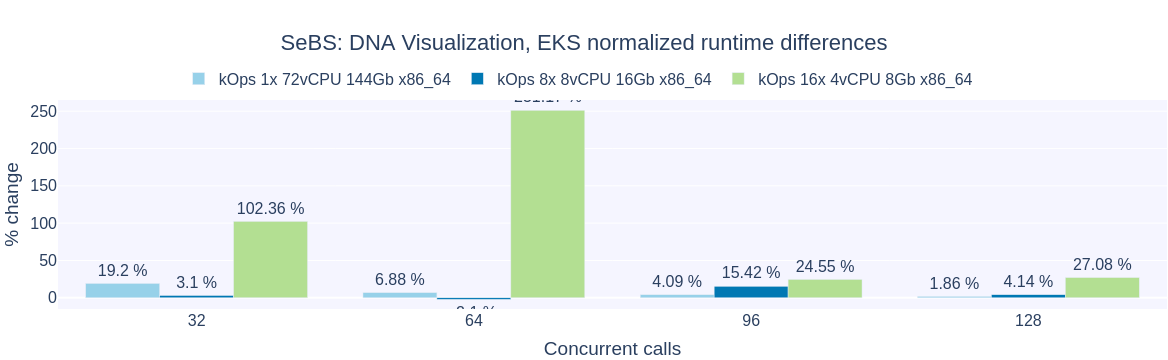

In [46]:
fig = create_figure('SeBS: DNA Visualization, EKS normalized runtime differences', 'Concurrent calls', '% change', concurrent_calls)

for i, k in enumerate(list(clusters.keys())[:-1]):
    y_data=[]
    y_text=[]
    for c in concurrent_calls:
        kops_mean=sebs_df[k]['dna'][c]['runtime'].mean()
        eks_mean=sebs_df['EKS 8x 8vCPU 16Gb x86_64']['dna'][c]['runtime'].mean()
        percent_change=(kops_mean - eks_mean) * 100 / eks_mean
        y_data.append(percent_change)
        y_text.append(f'{round(percent_change, 2)} %')
    fig.add_trace(go.Bar(name=k,
                         x=concurrent_calls,
                         y=y_data,
                         marker_color=colorPallet[i],
                         text=y_text,
                         textposition='outside'))
fig.update_layout(yaxis_range=[-15,265])

fig.show()

# Save graph
write_image(fig, 'sebs_dna_percentage_difference.png')

In [31]:
for k in list(clusters)[:-1]:
    display(HTML(f'<h3><b>{k}</b> and <b>EKS 8x 8vCPU 16Gb x86_64</b> independent t-test (DNA Visualization)</h3>'))
    for i in range(32,129,32):
        print(f'{i} concurrent calls')
        print(stats.ttest_ind(sebs_df[k]['dna'][i]['runtime'], sebs_df['EKS 8x 8vCPU 16Gb x86_64']['dna'][i]['runtime']))

32 concurrent calls
Ttest_indResult(statistic=11.101488762940454, pvalue=1.7067440928369475e-26)
64 concurrent calls
Ttest_indResult(statistic=5.030181611403259, pvalue=5.531954693034239e-07)
96 concurrent calls
Ttest_indResult(statistic=2.9288131090670126, pvalue=0.0034390711379472345)
128 concurrent calls
Ttest_indResult(statistic=1.5384674116735335, pvalue=0.12404764615338489)


32 concurrent calls
Ttest_indResult(statistic=1.4251443909020016, pvalue=0.1545599091627799)
64 concurrent calls
Ttest_indResult(statistic=-1.1985214953518124, pvalue=0.23091603304443417)
96 concurrent calls
Ttest_indResult(statistic=7.241590814632211, pvalue=6.212260415443479e-13)
128 concurrent calls
Ttest_indResult(statistic=2.5676334867361876, pvalue=0.010291613601740742)


32 concurrent calls
Ttest_indResult(statistic=18.06458203829675, pvalue=3.40788158743933e-60)
64 concurrent calls
Ttest_indResult(statistic=33.72998370614279, pvalue=3.8504727517734026e-181)
96 concurrent calls
Ttest_indResult(statistic=10.30672803618744, pvalue=2.7272335755982252e-24)
128 concurrent calls
Ttest_indResult(statistic=13.810392671756134, pvalue=5.792119436809326e-42)


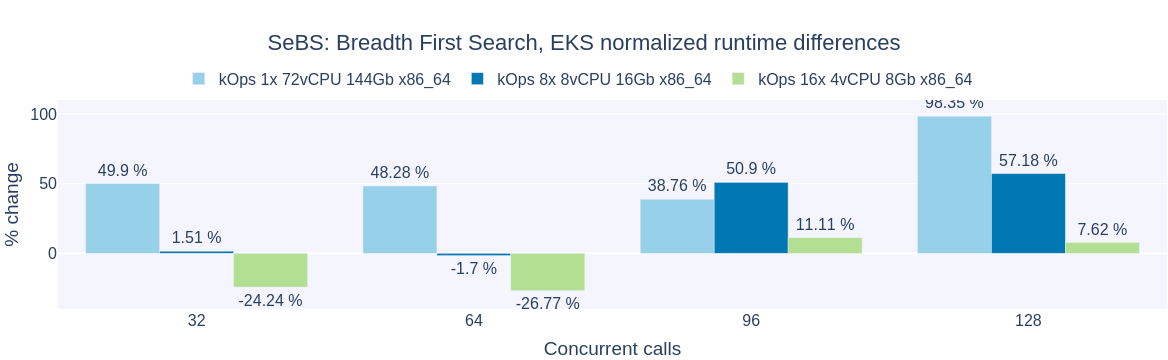

In [50]:
fig = create_figure('SeBS: Breadth First Search, EKS normalized runtime differences', 'Concurrent calls', '% change', concurrent_calls)

for i, k in enumerate(list(clusters.keys())[:-1]):
    y_data=[]
    y_text=[]
    for c in concurrent_calls:
        kops_mean=sebs_df[k]['bfs'][c]['runtime'].mean()
        eks_mean=sebs_df['EKS 8x 8vCPU 16Gb x86_64']['bfs'][c]['runtime'].mean()
        percent_change=(kops_mean - eks_mean) * 100 / eks_mean
        y_data.append(percent_change)
        y_text.append(f'{round(percent_change, 2)} %')
    fig.add_trace(go.Bar(name=k,
                         x=concurrent_calls,
                         y=y_data,
                         marker_color=colorPallet[i],
                         text=y_text,
                         textposition='outside'))
fig.update_layout(yaxis_range=[-40,110])
fig.show()

# Save graph
write_image(fig, 'sebs_bfs_percentage_difference.png')

In [33]:
for k in list(clusters)[:-1]:
    display(HTML(f'<h3><b>{k}</b> and <b>EKS 8x 8vCPU 16Gb x86_64</b> independent t-test (Breadth First Search)</h3>'))
    for i in range(32,129,32):
        print(f'{i} concurrent calls')
        print(stats.ttest_ind(sebs_df[k]['bfs'][i]['runtime'], sebs_df['EKS 8x 8vCPU 16Gb x86_64']['bfs'][i]['runtime']))

32 concurrent calls
Ttest_indResult(statistic=14.591385937970829, pvalue=2.5939278992952715e-42)
64 concurrent calls
Ttest_indResult(statistic=16.91865691937615, pvalue=1.3708395893385962e-58)
96 concurrent calls
Ttest_indResult(statistic=25.012589960590027, pvalue=3.819108984091684e-121)
128 concurrent calls
Ttest_indResult(statistic=6.6886487339589635, pvalue=2.7067902925545843e-11)


32 concurrent calls
Ttest_indResult(statistic=0.3916866885259684, pvalue=0.6954085951901683)
64 concurrent calls
Ttest_indResult(statistic=-0.8084681221756149, pvalue=0.4189579215732139)
96 concurrent calls
Ttest_indResult(statistic=2.862751400620855, pvalue=0.004241238574824475)
128 concurrent calls
Ttest_indResult(statistic=4.172150724032215, pvalue=3.108747925965763e-05)


32 concurrent calls
Ttest_indResult(statistic=-7.133334612454758, pvalue=2.4447754091408145e-12)
64 concurrent calls
Ttest_indResult(statistic=-13.030633122742609, pvalue=1.2358998052053654e-36)
96 concurrent calls
Ttest_indResult(statistic=6.651412073377436, pvalue=3.7282711140270924e-11)
128 concurrent calls
Ttest_indResult(statistic=5.547692081780463, pvalue=3.177141827016687e-08)


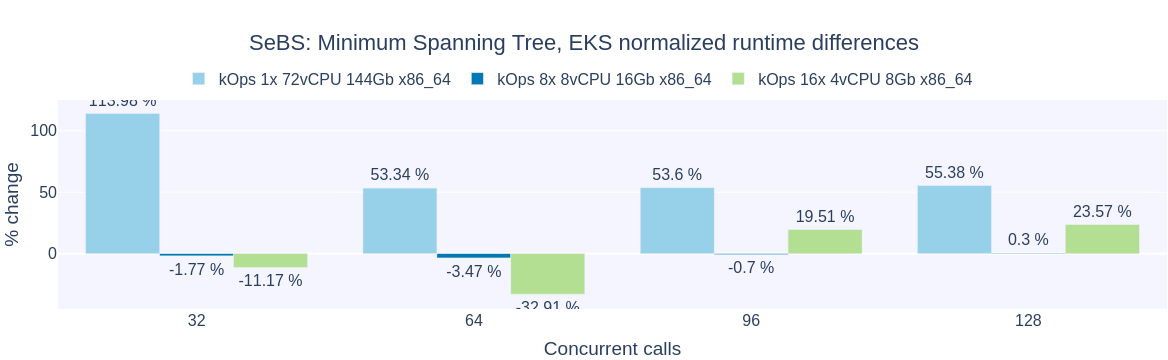

In [52]:
fig = create_figure('SeBS: Minimum Spanning Tree, EKS normalized runtime differences', 'Concurrent calls', '% change', concurrent_calls)

for i, k in enumerate(list(clusters.keys())[:-1]):
    y_data=[]
    y_text=[]
    for c in concurrent_calls:
        kops_mean=sebs_df[k]['mst'][c]['runtime'].mean()
        eks_mean=sebs_df['EKS 8x 8vCPU 16Gb x86_64']['mst'][c]['runtime'].mean()
        percent_change=(kops_mean - eks_mean) * 100 / eks_mean
        y_data.append(percent_change)
        y_text.append(f'{round(percent_change, 2)} %')
    fig.add_trace(go.Bar(name=k,
                         x=concurrent_calls,
                         y=y_data,
                         marker_color=colorPallet[i],
                         text=y_text,
                         textposition='outside'))
fig.update_layout(yaxis_range=[-45,125])
fig.show()

# Save graph
write_image(fig, 'sebs_mst_percentage_difference.png')

In [35]:
for k in list(clusters)[:-1]:
    display(HTML(f'<h3><b>{k}</b> and <b>EKS 8x 8vCPU 16Gb x86_64</b> independent t-test (Minimum Spanning Tree)</h3>'))
    for i in range(32,129,32):
        print(f'{i} concurrent calls')
        print(stats.ttest_ind(sebs_df[k]['mst'][i]['runtime'], sebs_df['EKS 8x 8vCPU 16Gb x86_64']['mst'][i]['runtime']))

32 concurrent calls
Ttest_indResult(statistic=26.190768941773467, pvalue=5.265530026649533e-106)
64 concurrent calls
Ttest_indResult(statistic=19.525645311229614, pvalue=2.5674203068036294e-75)
96 concurrent calls
Ttest_indResult(statistic=31.774691687111066, pvalue=2.1055706525940303e-181)
128 concurrent calls
Ttest_indResult(statistic=32.28225295462179, pvalue=8.756794264699957e-195)


32 concurrent calls
Ttest_indResult(statistic=-0.4492158847180817, pvalue=0.6534145789277719)
64 concurrent calls
Ttest_indResult(statistic=-1.5863142083619999, pvalue=0.1128929092506524)
96 concurrent calls
Ttest_indResult(statistic=-0.37470085487847327, pvalue=0.707920611463195)
128 concurrent calls
Ttest_indResult(statistic=0.18630955370852104, pvalue=0.852215445146286)


32 concurrent calls
Ttest_indResult(statistic=-2.9137214660647888, pvalue=0.0036850349973712353)
64 concurrent calls
Ttest_indResult(statistic=-16.933580878222426, pvalue=1.914100176819247e-58)
96 concurrent calls
Ttest_indResult(statistic=10.574844283245213, pvalue=1.789574411979273e-25)
128 concurrent calls
Ttest_indResult(statistic=14.514650180206152, pvalue=5.15722865205636e-46)


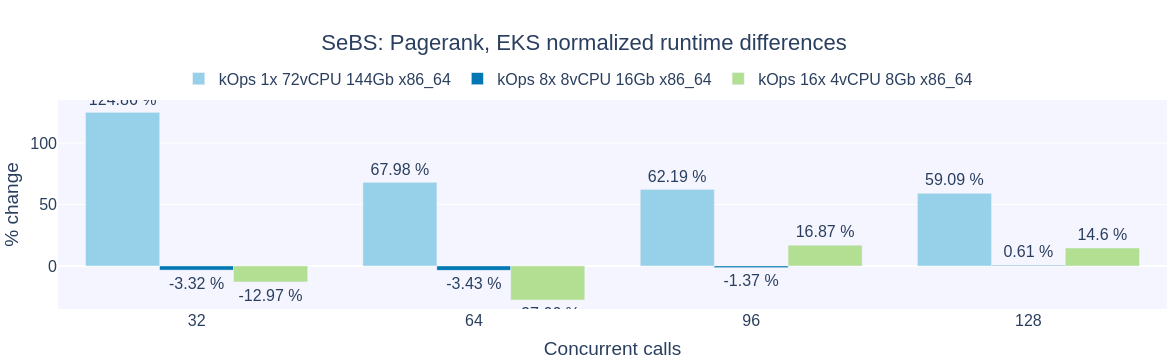

In [55]:
fig = create_figure('SeBS: Pagerank, EKS normalized runtime differences', 'Concurrent calls', '% change', concurrent_calls)

for i, k in enumerate(list(clusters.keys())[:-1]):
    y_data=[]
    y_text=[]
    for c in concurrent_calls:
        kops_mean=sebs_df[k]['pagerank'][c]['runtime'].mean()
        eks_mean=sebs_df['EKS 8x 8vCPU 16Gb x86_64']['pagerank'][c]['runtime'].mean()
        percent_change=(kops_mean - eks_mean) * 100 / eks_mean
        y_data.append(percent_change)
        y_text.append(f'{round(percent_change, 2)} %')
    fig.add_trace(go.Bar(name=k,
                         x=concurrent_calls,
                         y=y_data,
                         marker_color=colorPallet[i],
                         text=y_text,
                         textposition='outside'))
fig.update_layout(yaxis_range=[-35,135])
fig.show()

# Save graph
write_image(fig, 'sebs_pagerank_percentage_difference.png')

In [37]:
for k in list(clusters)[:-1]:
    display(HTML(f'<h3><b>{k}</b> and <b>EKS 8x 8vCPU 16Gb x86_64</b> independent t-test (Pagerank)</h3>'))
    for i in range(32,129,32):
        print(f'{i} concurrent calls')
        print(stats.ttest_ind(sebs_df[k]['pagerank'][i]['runtime'], sebs_df['EKS 8x 8vCPU 16Gb x86_64']['pagerank'][i]['runtime']))

32 concurrent calls
Ttest_indResult(statistic=29.06015359329322, pvalue=1.6320034835034288e-122)
64 concurrent calls
Ttest_indResult(statistic=31.531615202881373, pvalue=1.7104636906046387e-165)
96 concurrent calls
Ttest_indResult(statistic=37.554188377974064, pvalue=8.17117080694781e-237)
128 concurrent calls
Ttest_indResult(statistic=42.47205301579724, pvalue=5.127913121373634e-305)


32 concurrent calls
Ttest_indResult(statistic=-0.8389577176568068, pvalue=0.40177862512175944)
64 concurrent calls
Ttest_indResult(statistic=-1.7534614912272835, pvalue=0.07974071548679858)
96 concurrent calls
Ttest_indResult(statistic=-0.9032097779907601, pvalue=0.3665176690671659)
128 concurrent calls
Ttest_indResult(statistic=0.47338755086220563, pvalue=0.6359734299756474)


32 concurrent calls
Ttest_indResult(statistic=-3.47107115185134, pvalue=0.0005501178750108452)
64 concurrent calls
Ttest_indResult(statistic=-14.363913186478667, pvalue=1.2548143597097889e-43)
96 concurrent calls
Ttest_indResult(statistic=10.83292871337774, pvalue=1.28192087938729e-26)
128 concurrent calls
Ttest_indResult(statistic=11.381244564754605, pvalue=2.410790215496347e-29)
